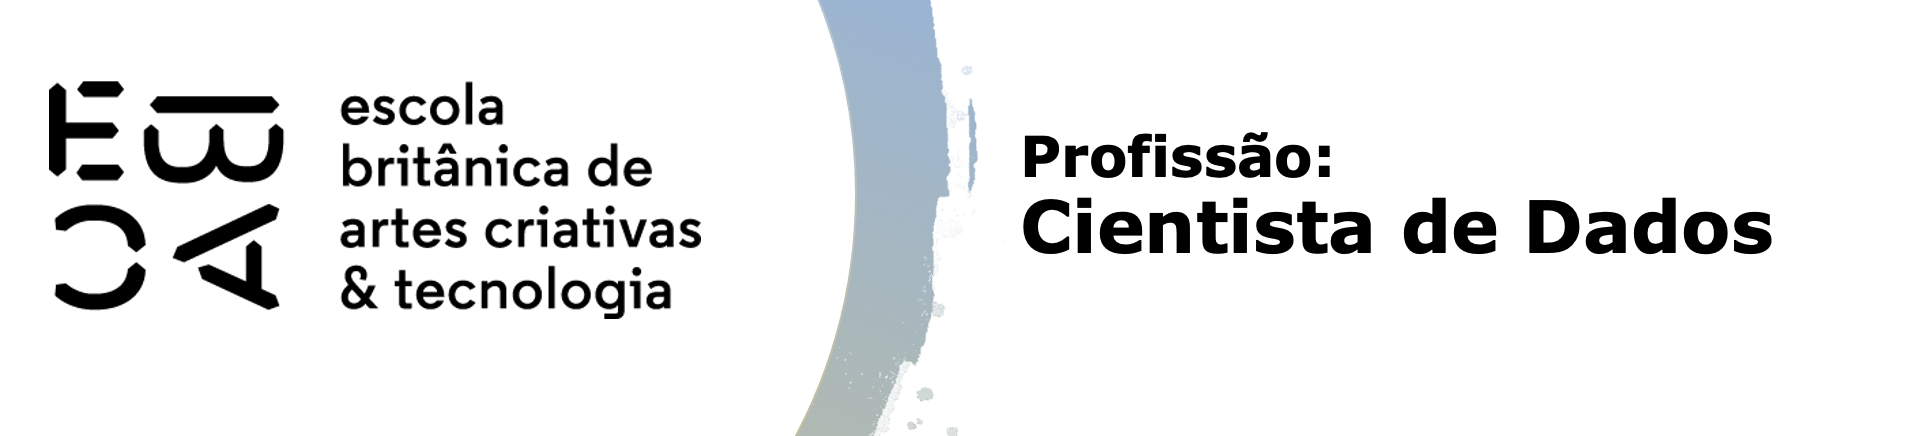

# Árvores II - Tarefa 3

### 1. Carregar as bases

Vamos utilizar nesta tarefa as bases de reconhecimento de atividade humana através do celular. Carregue novamente as bases salvas na tarefa I.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

In [2]:
# Versão dos pacotes e do python.
%reload_ext watermark
%watermark --iversions --python

Python implementation: CPython
Python version       : 3.11.3
IPython version      : 8.12.0

seaborn   : 0.12.2
matplotlib: 3.7.1
pandas    : 1.5.3
numpy     : 1.23.5



In [3]:
# Lendo CSV de X_train.

X_train = pd.read_csv("./output/X_train.csv", index_col=['indice', 'indv'], usecols=['indice', 'indv', 'tGravityAcc-energy()-X', 'fBodyAccJerk-energy()-X', 'angle(Y,gravityMean)'])
X_train

,,tGravityAcc-energy()-X,fBodyAccJerk-energy()-X,"angle(Y,gravityMean)"
indice,indv,,,
0,1,0.899469,-0.999935,0.179941
1,1,0.907829,-0.999960,0.180289
2,1,0.908668,-0.999894,0.180637
3,1,0.910621,-0.999923,0.181935
4,1,0.912235,-0.999969,0.185151
...,...,...,...,...
7347,30,0.794766,-0.751552,0.238604
7348,30,0.782407,-0.786336,0.252676
7349,30,0.786085,-0.782778,0.249145


In [4]:
# Lendo CSV de X_test.

X_test = pd.read_csv("./output/X_test.csv", index_col=['indice', 'indv'], usecols=['indice', 'indv', 'tGravityAcc-energy()-X', 'fBodyAccJerk-energy()-X', 'angle(Y,gravityMean)'])
X_test

,,tGravityAcc-energy()-X,fBodyAccJerk-energy()-X,"angle(Y,gravityMean)"
indice,indv,,,
0,1,0.829297,-0.995036,0.276801
1,1,0.805575,-0.998371,0.281343
2,1,0.812044,-0.999899,0.280083
3,1,0.809379,-0.999895,0.284114
4,1,0.803500,-0.999914,0.290722
...,...,...,...,...
2942,16,0.712964,-0.827070,0.274627
2943,16,0.713748,-0.793557,0.273578
2944,16,0.712784,-0.810651,0.274479


In [5]:
# Lendo CSV de y_.

y_train = pd.read_csv("./output/y_train.csv", index_col=0)
y_train

,Atividade
0,5_STANDING
1,5_STANDING
2,5_STANDING
3,5_STANDING
4,5_STANDING
...,...
7347,2_WALKING_UPSTAIRS
7348,2_WALKING_UPSTAIRS
7349,2_WALKING_UPSTAIRS
7350,2_WALKING_UPSTAIRS


In [6]:
# Lendo CSV de y_.

y_test = pd.read_csv("./output/y_test.csv", index_col=0)
y_test

,Atividade
0,5_STANDING
1,5_STANDING
2,5_STANDING
3,5_STANDING
4,5_STANDING
...,...
2942,2_WALKING_UPSTAIRS
2943,2_WALKING_UPSTAIRS
2944,2_WALKING_UPSTAIRS
2945,2_WALKING_UPSTAIRS


### 2. Calcule os ```ccp_alphas```. 

Vamos seguir uma lógica bem em linha com o que já estamso acostumados, com as seguintes orientações:

- Utilizar treinamento e teste conforme já vieram definidos originalmente
- Por pragmatismo, utilizar ```min_samples_leaf=20```
- Utilize as mesmas "3 melhores variáveis" identificadas no exercício anterior.

In [7]:
clf = DecisionTreeClassifier(random_state=2360873, min_samples_leaf=20)
caminho = clf.cost_complexity_pruning_path(X=X_train, y=y_train)
ccp_alphas, impurities = caminho.ccp_alphas, caminho.impurities

In [8]:
# garantindo que os ccp_alphas são únicos e positivos

ccp_alphas = np.unique(ccp_alphas[ccp_alphas>=0])

### 3. *Grid Search*

Vou deixar especificações iniciais mínimas, que visam limitar o tempo de máquina, pois um procedimento desses pode demorar muito tempo dependendo da especificação. Mas conforme você for ficando confortável com o tempo consumido pelo procedimento, pode fazer um algoritmo mais exaustivo, por exemplo, avaliando mais valores de ```ccp_alpha```.

- Meça o tempo
- Utilize a base de treinamento
- Utilize um *cross validation* do tipo *k-fold*, especifique k=10
- Você pode ler 1 a cada ```k``` valores para uma melhor varredura utilizando, por exemplo, ```ccp_alpha[::10]```
- Não se esqueça de limitar o número de variáveis

In [9]:
grid_parametros = {'ccp_alpha': ccp_alphas}
grid_parametros

{'ccp_alpha': array([0.00000000e+00, 6.37714026e-06, 6.60084491e-06, 9.32165515e-06,
        1.10609725e-05, 1.11621233e-05, 1.16993996e-05, 1.32239149e-05,
        1.93721766e-05, 3.03082273e-05, 3.26441785e-05, 3.58470836e-05,
        3.85932228e-05, 4.39440864e-05, 4.76060936e-05, 4.85876625e-05,
        4.87672178e-05, 4.91147652e-05, 5.60288519e-05, 5.96567589e-05,
        5.99304358e-05, 6.04521823e-05, 6.68155699e-05, 8.13766447e-05,
        8.29267437e-05, 8.47410056e-05, 9.15947028e-05, 9.22422367e-05,
        9.95342357e-05, 1.04094957e-04, 1.12334357e-04, 1.54270465e-04,
        1.55697585e-04, 1.62532197e-04, 1.66944446e-04, 1.74265498e-04,
        1.74540860e-04, 1.97473546e-04, 2.01164918e-04, 2.02510187e-04,
        2.10471540e-04, 2.10826986e-04, 2.13037745e-04, 2.19065817e-04,
        2.55564685e-04, 2.76080855e-04, 2.81401091e-04, 2.87329645e-04,
        2.88373503e-04, 2.94823558e-04, 3.00279921e-04, 3.50171229e-04,
        3.52629660e-04, 3.67806870e-04, 3.92465562e

In [10]:
%%time

grid = GridSearchCV(estimator=clf, param_grid=grid_parametros, cv=10, verbose=100)
grid.fit(X_train, y_train)

Fitting 10 folds for each of 110 candidates, totalling 1100 fits
[CV 1/10; 1/110] START ccp_alpha=0.0............................................
[CV 1/10; 1/110] END .............ccp_alpha=0.0;, score=0.713 total time=   0.0s
[CV 2/10; 1/110] START ccp_alpha=0.0............................................
[CV 2/10; 1/110] END .............ccp_alpha=0.0;, score=0.704 total time=   0.0s
[CV 3/10; 1/110] START ccp_alpha=0.0............................................
[CV 3/10; 1/110] END .............ccp_alpha=0.0;, score=0.795 total time=   0.0s
[CV 4/10; 1/110] START ccp_alpha=0.0............................................
[CV 4/10; 1/110] END .............ccp_alpha=0.0;, score=0.729 total time=   0.0s
[CV 5/10; 1/110] START ccp_alpha=0.0............................................
[CV 5/10; 1/110] END .............ccp_alpha=0.0;, score=0.743 total time=   0.0s
[CV 6/10; 1/110] START ccp_alpha=0.0............................................
[CV 6/10; 1/110] END .............ccp_alpha=

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(min_samples_leaf=20,
                                              random_state=2360873),
             param_grid={'ccp_alpha': array([0.00000000e+00, 6.37714026e-06, 6.60084491e-06, 9.32165515e-06,
       1.10609725e-05, 1.11621233e-05, 1.16993996e-05, 1.32239149e-05,
       1.93721766e-05, 3.03082273e-05, 3.26441785e-05, 3.58470836e-05,
       3.85932228e-05, 4.39440864e-05, 4.76060936e-05,...
       1.20133204e-03, 1.25126209e-03, 1.34880539e-03, 1.40661682e-03,
       1.71020879e-03, 1.93445172e-03, 1.98830540e-03, 1.99264525e-03,
       2.27897673e-03, 2.30144574e-03, 2.71380850e-03, 2.99886102e-03,
       3.06996958e-03, 3.57915844e-03, 4.14002258e-03, 4.22772118e-03,
       4.51431456e-03, 6.10550331e-03, 6.86064858e-03, 7.08303463e-03,
       1.22238508e-02, 3.51425713e-02, 4.55219902e-02, 1.09230455e-01,
       1.67058861e-01, 1.85811143e-01])},
             verbose=100)

In [11]:
resultados = pd.DataFrame(grid.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.022700,0.002180,0.003377,0.000540,0.0,{'ccp_alpha': 0.0},0.713315,0.703804,0.794558,0.729252,0.742857,0.726531,0.759184,0.704762,0.820408,0.752381,0.744705,0.036484,62
1,0.021232,0.001024,0.002821,0.000189,0.000006,{'ccp_alpha': 6.3771402614921555e-06},0.713315,0.703804,0.794558,0.729252,0.742857,0.726531,0.759184,0.704762,0.820408,0.752381,0.744705,0.036484,62
2,0.020548,0.000558,0.002817,0.000148,0.000007,{'ccp_alpha': 6.600844908148895e-06},0.713315,0.703804,0.794558,0.729252,0.742857,0.726531,0.759184,0.704762,0.820408,0.752381,0.744705,0.036484,62
3,0.020011,0.000330,0.002778,0.000187,0.000009,{'ccp_alpha': 9.321655146143134e-06},0.713315,0.703804,0.794558,0.729252,0.742857,0.726531,0.759184,0.704762,0.820408,0.752381,0.744705,0.036484,62
4,0.021608,0.003328,0.002837,0.000245,0.000011,{'ccp_alpha': 1.1060972502198961e-05},0.713315,0.703804,0.794558,0.729252,0.742857,0.726531,0.759184,0.704762,0.820408,0.752381,0.744705,0.036484,62


In [12]:
grid.best_score_

0.7769308266784976

### 4. Avaliando a árvore

- Obtenha a árvore na melhor configuração treinada em toda a base de treino
- Calcule a acurácia dessa árvore na base de testes
- Visualize a matriz de confusão

In [13]:
melhor_ccp = resultados.iloc[grid.best_index_,4]

clf = DecisionTreeClassifier(random_state=2360873, ccp_alpha=melhor_ccp).fit(X_train, y_train)

In [14]:
clf.score(X_test, y_test)

0.7020699015948422

In [29]:
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_true=y_test,y_pred=y_pred)
cm

array([[441,  34,  21,   0,   0,   0],
       [ 82, 357,  32,   0,   0,   0],
       [ 13,  55, 352,   0,   0,   0],
       [  0,   0,   0, 375, 116,   0],
       [  0,   0,   0,  73, 459,   0],
       [  0,   0,   0,   0,   0, 537]])

In [45]:
cm.sum(axis=1)

array([496, 471, 420, 491, 532, 537])

In [46]:
print(cm[0,0]/cm.sum(axis=1)[0])
print(cm[1,1]/cm.sum(axis=1)[1])

0.8891129032258065
0.7579617834394905


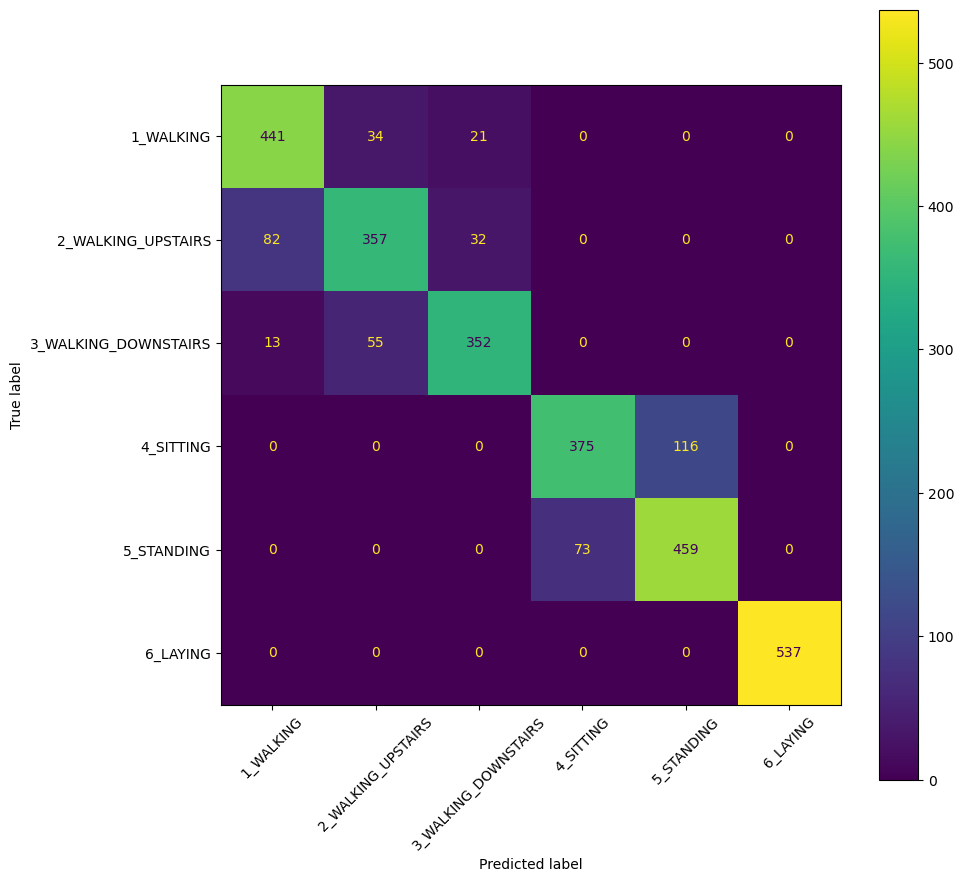

In [21]:
plt.rc('figure', figsize=(10,10))
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)
plt.tick_params(axis='x', rotation=45)
plt.show()

### 5. Melhorando a árvore

A melhor forma de se melhorar um algoritmo é colocando nele novas variáveis que agreguem valor. Podemos usar a força-bruta e ir colocando variáveis aleatoriamente - ou colocar todas e deixar rodando por um bom tempo - ou utilizar uma lógica eficiente e fazer uma seleção de variáveis.

- Observe que há classes mais fáceis e mais difíceis de se identificar
- Crie uma variável binária para uma das classes de maior erro
- Fala uma árvore de classificação bem simples para esta variável:
    - utilize ```mean_samples_leaf=20```
    - utilize ```max_depth=4```
    - coloque todas as variáveis
- Observe a importância das variáveis, e selecione as 3 com maior importância
- Rode novamente o algoritmo acima com as 3 novas variáveis e avalie a acurácia

In [16]:
# Lendo CSV de X_train.

X_train = pd.read_csv("./output/X_train.csv", index_col=['indice', 'indv'])
X_train

,,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
indice,indv,,,,,,,,,,,,,,,,,,,,,
0,1,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,1,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,1,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,1,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,30,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.070157,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819
7348,30,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,0.165259,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053
7349,30,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.195034,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811


In [17]:
# Lendo CSV de X_test.

X_test = pd.read_csv("./output/X_test.csv", index_col=['indice', 'indv'])
X_test

,,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
indice,indv,,,,,,,,,,,,,,,,,,,,,
0,1,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978
1,1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898
2,1,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346
3,1,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,0.116695,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108
4,1,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.121711,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,16,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,0.074472,-0.376278,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784
2943,16,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,0.101859,-0.320418,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412
2944,16,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.066249,-0.118854,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184


In [18]:
clf = DecisionTreeClassifier(random_state=2360873).fit(X_train,y_train)
(pd.DataFrame(X_train.columns).rename({0:"Variável"},axis=1)
                              .assign(importances = clf.feature_importances_)
                              .sort_values(by='importances', ascending=False))[:3]

,Variável,importances
52,tGravityAcc-min()-X,0.239945
265,fBodyAcc-mean()-X,0.201332
559,"angle(Y,gravityMean)",0.132345
